# Exporting time series to Pastastore using hydropandas

This notebook shows how to use the `hydropandas` package to create a `PastaStore` from point observations. A `pastastore` is a combination of observations, stresses and `pastas` time series models.

## Contents<a id=top></a>

1. [Exporting oseries](#oseries)
2. [Exporting stresses](#stresses)
3. [Create and solve models](#models)
4. [Getting model results](#modelresults)

In [1]:
import pastastore as pst
import pandas as pd
import pastas as ps

import hydropandas as hpd
import logging

In [2]:
ps.set_log_level('ERROR')
logging.basicConfig(level=logging.INFO)

## [Exporting oseries](#top)<a id=oseries></a>

In [3]:
extent = [117850, 117980, 439550, 439700]  # Schoonhoven zuid-west
dinozip = 'data/dino.zip'
oc_dino = hpd.ObsCollection.from_dino(dirname=dinozip, keep_all_obs=False)
oc_dino = oc_dino.loc[['B58A0092-004', 'B58A0092-005', 'B58A0102-001', 'B58A0167-001', 'B58A0212-001']]
oc_dino

INFO:hydropandas.io.io_dino:reading -> B02H0092001_1.csv
INFO:hydropandas.io.io_dino:reading -> B02H1007001_1.csv
INFO:hydropandas.io.io_dino:reading -> B04D0032002_1.csv
INFO:root:not added to collection -> C:\Users\vonkm\AppData\Local\Temp\tmpk948fwmj\Grondwaterstanden_Put\B04D0032002_1.csv
INFO:hydropandas.io.io_dino:reading -> B22D0155001_1.csv
INFO:hydropandas.io.io_dino:reading -> B27D0260001_1.csv
INFO:root:not added to collection -> C:\Users\vonkm\AppData\Local\Temp\tmpk948fwmj\Grondwaterstanden_Put\B27D0260001_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0080001_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0080002_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0133001_1.csv
INFO:hydropandas.io.io_dino:reading -> B33F0133002_1.csv
INFO:hydropandas.io.io_dino:reading -> B37A0112001_1.csv
INFO:root:not added to collection -> C:\Users\vonkm\AppData\Local\Temp\tmpk948fwmj\Grondwaterstanden_Put\B37A0112001_1.csv
INFO:hydropandas.io.io_dino:reading -> B42B0003001_1.csv
INFO

,x,y,filename,locatie,filternr,bovenkant_filter,onderkant_filter,maaiveld,meetpunt,metadata_available,obs
name,,,,,,,,,,,
B58A0092-004,186924.0,372026.0,C:\Users\vonkm\AppData\Local\Temp\tmpk948fwmj\...,B58A0092,4.0,-115.23,-117.23,29.85,29.61,True,-----metadata------ name : B58A0092-004 x : 1...
B58A0092-005,186924.0,372026.0,C:\Users\vonkm\AppData\Local\Temp\tmpk948fwmj\...,B58A0092,5.0,-134.23,-137.23,29.84,29.62,True,-----metadata------ name : B58A0092-005 x : 1...
B58A0102-001,187900.0,373025.0,C:\Users\vonkm\AppData\Local\Temp\tmpk948fwmj\...,B58A0102,1.0,-3.35,-8.35,29.65,29.73,True,-----metadata------ name : B58A0102-001 x : 1...
B58A0167-001,185745.0,371095.0,C:\Users\vonkm\AppData\Local\Temp\tmpk948fwmj\...,B58A0167,1.0,23.33,22.33,30.50,30.21,True,-----metadata------ name : B58A0167-001 x : 1...
B58A0212-001,183600.0,373020.0,C:\Users\vonkm\AppData\Local\Temp\tmpk948fwmj\...,B58A0212,1.0,26.03,25.53,28.49,28.53,True,-----metadata------ name : B58A0212-001 x : 1...


In [4]:
oc_dino.stats.get_first_last_obs_date()

,date_first_measurement,date_last_measurement
name,,
B58A0092-004,1979-02-28,2018-07-31
B58A0092-005,1979-02-28,2014-12-31
B58A0102-001,1982-03-30,2000-06-14
B58A0167-001,1979-02-28,2002-02-28
B58A0212-001,1963-05-28,2001-11-28


In [5]:
# add observations to pastastore
pstore = oc_dino.to_pastastore()

INFO:hydropandas.io.io_pastas:add to pastastore -> B58A0092-004
INFO:hydropandas.io.io_pastas:add to pastastore -> B58A0092-005
INFO:hydropandas.io.io_pastas:add to pastastore -> B58A0102-001
INFO:hydropandas.io.io_pastas:add to pastastore -> B58A0167-001
INFO:hydropandas.io.io_pastas:add to pastastore -> B58A0212-001


## [Exporting stresses](#top)<a id=stresses></a>

In [6]:
tmintmax = pstore.get_tmin_tmax("oseries")

tmin = tmintmax.tmin.min()
tmax = tmintmax.tmax.max()

In [7]:
meteo_vars=('RH', 'EV24')
kinds = ('prec', 'evap')
knmi_oc = hpd.ObsCollection.from_knmi(locations=oc_dino, 
                                      meteo_vars=meteo_vars,
                                      starts=tmin, 
                                      ends=tmax)
knmi_oc

INFO:hydropandas.io.io_knmi:download knmi RH data from station 377-ELL between 1963-05-28 00:00:00 and 2018-07-24 00:00:00
INFO:hydropandas.io.io_knmi:transform RH, Etmaalsom van de neerslag (in 0.1 mm) (0 voor <0.05mm) / Daily precipitation amount (in 0.1 mm) (0 for <0.05mm) lower than 0.05 mm to 0 mm
INFO:hydropandas.io.io_knmi:station 377 has no measurements before 1999-07-16 01:00:00
INFO:hydropandas.io.io_knmi:station 377 has 13198 missing measurements
INFO:hydropandas.io.io_knmi:trying to fill 13198 measurements with station [380]
INFO:hydropandas.io.io_knmi:download knmi RH data from station 380-MAASTRICHT between 1963-05-28 00:00:00 and 2018-07-24 00:00:00
INFO:hydropandas.io.io_knmi:transform RH, Etmaalsom van de neerslag (in 0.1 mm) (0 voor <0.05mm) / Daily precipitation amount (in 0.1 mm) (0 for <0.05mm) lower than 0.05 mm to 0 mm
INFO:hydropandas.io.io_knmi:download knmi EV24 data from station 377-ELL between 1963-05-28 00:00:00 and 2018-07-24 00:00:00
INFO:hydropandas.io.i

,x,y,filename,station,meteo_var,obs
name,,,,,,
RH_ELL,181488.403514,356704.652138,,377,RH,-----metadata------ name : RH_ELL x : 181488....
EV24_ELL,181488.403514,356704.652138,,377,EV24,-----metadata------ name : EV24_ELL x : 18148...


In [8]:
# add stresses to pastastore
for i, meteo_var in enumerate(meteo_vars):
    knmi_oc[knmi_oc.meteo_var == meteo_var].to_pastastore(pstore,
                                                          obs_column=meteo_var,
                                                          kind=kinds[i])


INFO:hydropandas.io.io_pastas:add to pastastore -> RH_ELL
INFO:hydropandas.io.io_pastas:did not add LON_east to metadata because datatype is <class 'dict'>
INFO:hydropandas.io.io_pastas:did not add LAT_north to metadata because datatype is <class 'dict'>
INFO:hydropandas.io.io_pastas:did not add ALT_m to metadata because datatype is <class 'dict'>
INFO:hydropandas.io.io_pastas:did not add NAME to metadata because datatype is <class 'dict'>
INFO:hydropandas.io.io_pastas:add to pastastore -> EV24_ELL
INFO:hydropandas.io.io_pastas:did not add LON_east to metadata because datatype is <class 'dict'>
INFO:hydropandas.io.io_pastas:did not add LAT_north to metadata because datatype is <class 'dict'>
INFO:hydropandas.io.io_pastas:did not add ALT_m to metadata because datatype is <class 'dict'>
INFO:hydropandas.io.io_pastas:did not add NAME to metadata because datatype is <class 'dict'>


## [Creating and solving models](#top)<a id=models></a>

In [9]:
pstore.create_models_bulk(store=True, add_recharge=True, ignore_errors=False);

Bulk creation models: 100%|██████████| 5/5 [00:00<00:00, 17.34it/s]


In [10]:
pstore.solve_models()

Solving models: 100%|██████████| 5/5 [00:07<00:00,  1.48s/it]


## [Getting model results](#top)<a id=modelresults></a>

In [11]:
pstore.get_statistics(["evp"])

B58A0092-004    61.425704
B58A0092-005    51.133048
B58A0102-001    84.542629
B58A0167-001    74.555391
B58A0212-001    65.865557
Name: evp, dtype: float64

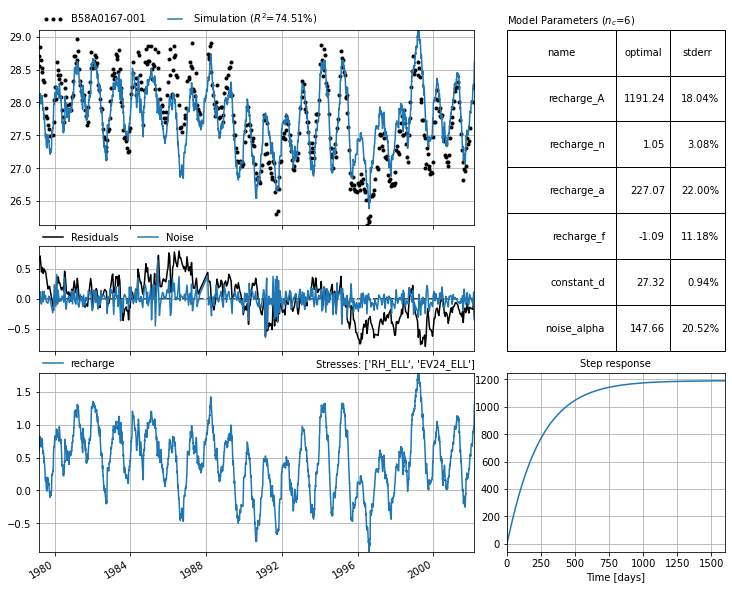

In [12]:
# results from a single model
ml1 = pstore.get_models('B58A0167-001')
ml1.plots.results();